#### THE FOLLOWING ANALYSIS IS DONE AFTER DATA PREPORCESSING. BECAUSE AFTERWARDS WE HAVE THE IMPORTANT FEATURES FILTERED OUT THAT AFFECT THE LABEL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('automobileEDA.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>

<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

$$
Y: Response \ Variable\\\\\\\\
X: Predictor \ Variables
$$

<b>Linear Function</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-mpg" help us predict car price?</h4>
For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.


In [6]:
X = df[['highway-mpg']]
Y = df['price']

lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat = lm.predict(X)
#Yhat[0:5]
Yhat

In [8]:
Yhat[0:5] #slicing up the 1D array, we get the first 5 terms of the prediction

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [9]:
lm.intercept_ #value of intercept

38423.3058581574

In [10]:
lm.coef_ #value of slope

array([-821.73337832])

In [21]:

lm1 = LinearRegression()
X1 = df[['engine-size']]
Y1 = df['price']




In [23]:
lm1.fit(X1,Y1)

Yhat1 = lm1.predict(X1)
Yhat1[0:5]


array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [24]:
lm1.intercept_

-7963.338906281024

In [25]:
lm1.coef_ #slope

array([166.86001569])

In [26]:
Yhat1=-7963.34 + 166.86*X1

#Price=-7963.34 + 166.86*engine-size



#### MULTIPLE LINEAR REGRESSION

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$

$$
a: intercept\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [30]:
lm2=LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm2.fit(Z,df['price'])

LinearRegression()

In [31]:
lm2.intercept_

-15806.62462632923

In [32]:
lm2.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<h2>2. Model Evaluation Using Visualization</h2>

Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

<h3>Regression Plot</h3>

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


In [34]:
import seaborn as sns
%matplotlib inline

(0.0, 48184.42879368975)

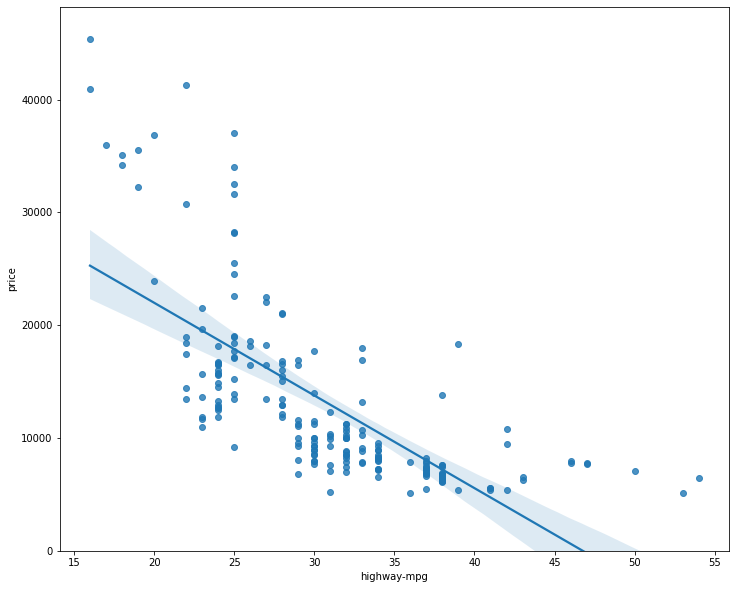

In [35]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>


(0.0, 47414.1)

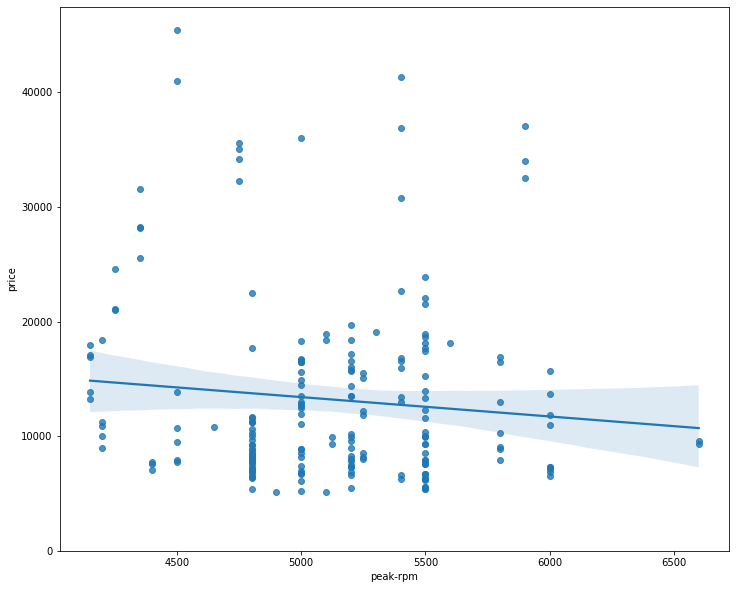

In [36]:
# regressionplot for "peak-rpm"
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>


In [37]:
df[["peak-rpm","highway-mpg","price"]].corr() #To cheeck the correlation between them

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [38]:
#all the value are negative, meaning they are negatively correlated

<h1>VERY IMPORTANT</h1>

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


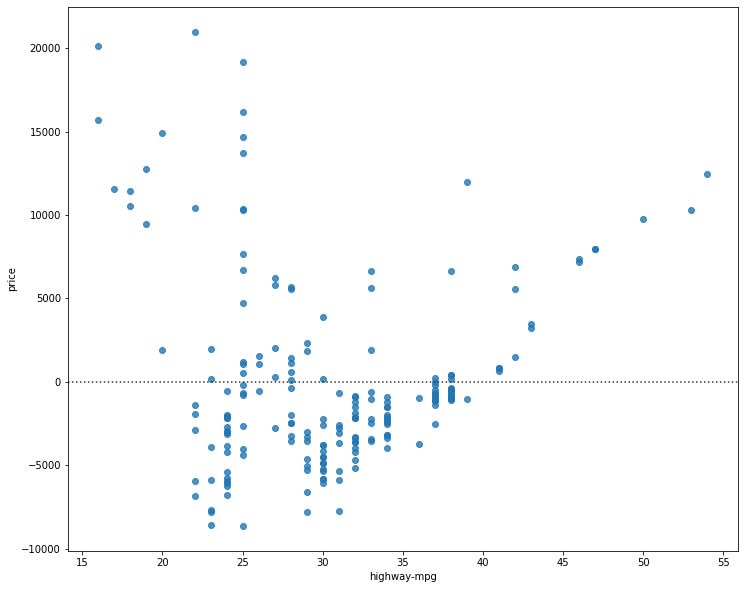

In [40]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


# IMPORTANT
#### MULTIPLE LINEAR REGRESSION

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>



In [41]:
Y_hat = lm2.predict(Z)

C:\Users\mehra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mehra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


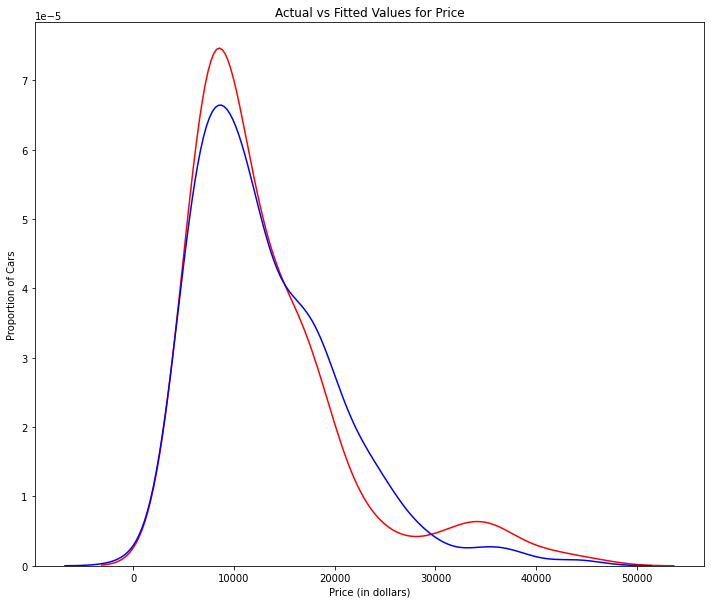

In [44]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

RED: ACTUAL VALUES

BLUE: PREDICTED VALUES AFTER PASSING THROUGH THE MODEL

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd Order</b></center>

$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>

$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>

$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>



In [48]:
#In this case we will use a function to plot the data

def PlotPolly(model,independent_variable,
                dependent_variable,
                Name):
                x_new = np.linspace(15,55,100)
                #we generate equally spaced intervals
                    #start: 15
                    #stop: 55
                    #number_of_sample: 100
                y_new = model(x_new)

                plt.plot(independent_variable,dependent_variable,
                        '.',x_new,y_new,'-')
                plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
                ax = plt.gca() #get current axes
                ax.set_facecolor((0.898,0.898,0.898))
                fig=plt.gcf() #get current figure
                plt.xlabel(Name)
                plt.ylabel('Price of Cars')

                plt.show()
                plt.close()


In [49]:
x = df['highway-mpg']
y = df['price']
#variables are stored here

In [51]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

#numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


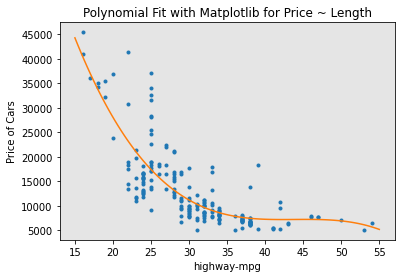

In [52]:
#we get a polynomial of order 3 as shown above

#PLOTTING THE FUNCTION USING THE FUNCTION THAT WE CREATED

PlotPolly(p, x, y, 'highway-mpg')



In [53]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


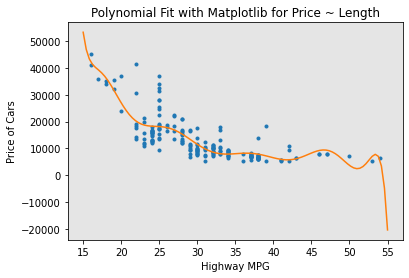

In [55]:
#incase we try fitting a 1 order polynomial
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

#And this model comparatively fits much much better


But things start getting difficult when we start to have
multivariate polynomials which are not just linear

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


In [56]:
# #We can perform polynomial transform on multiple features
# multiple features => multiple variable in the polynomial
# for a single label, i.e for a single dependent variable 'y'

from sklearn.preprocessing import PolynomialFeatures

In [57]:
pr = PolynomialFeatures(degree=2)
# We create a polynomial features object of degree 2
pr

PolynomialFeatures()

In [58]:
Z_pr = pr.fit_transform(Z)

In [59]:
Z.shape

#201 samples and 4 features


(201, 4)

In [61]:
Z_pr.shape

#after transformation, there are 201 samples and 15 features

(201, 15)

### PIPELINE

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [63]:
Input =[
    ('scale',StandardScaler()),
    ('polynomial',PolynomialFeatures(include_bias=False)),
    ('model',LinearRegression())
    ]

    #We input the list as an argument to the pipeline constructor
    

In [65]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

### PIPELINING AND WHY USE IT

The Pipeline constructor from sklearn allows you to chain transformers and estimators together into a sequence that functions as one cohesive unit. For example, if your model involves feature selection, standardization, and then regression, those three steps, each as it's own class, could be encapsulated together via Pipeline.

Ensures that each transformation of the data is being performed in the correct order, protects from inadvertent data leakage during cross-validation.
You can call .fit and .predict only once despite having a whole sequence of estimators. Convenient.
You can grid-search once over all parameters of all your transformers and estimators!
While writing code to search for the best estimator, you're also writing your final pipeline for training, and maybe even for predicting on new data once in production!

All estimators in a pipeline, except for the last one, must be transformers (i.e. they take X, do something to X, and then spit out a transformed X). The final estimator can be another transformer, classifer, regressor, etc.

The following code shows implementation of a pipeline that uses two transformers (StandardScaler() and PolynomialFeatures) and one classifier (LinearRegression().

  Input =[
    ('scale',StandardScaler()),
    ('polynomial',PolynomialFeatures(include_bias=False)),
    ('model',LinearRegression())
    ]

# Now we do the following

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously.

In [66]:
Z = Z.astype(float)
pipe.fit(Z,y)


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

##### Why do we need to standardize data?
Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

##### Polynomial Transform

This is done, to transform the polynomial into another polynomial with a higher degree

In [67]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

#### MEASURES FOR IN SAMPLE EVALUATION

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate <h5>how close the data is to the fitted regression line</h5>.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, <h5>the difference between actual value (y) and the estimated value (ŷ).</h5></p>


In [68]:
#Model 1: Simple Linear Regression

# Let us calculate the R-squared

lm.fit(X,Y) #Fit the model first
lm.score(X,Y) #GIVES US THE R^2


0.4965911884339176

In [69]:
Yhat = lm.predict(X)
Yhat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [71]:
# Let's import the function 'mean_squared_error'
#  from the module 'metrics':

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'],Yhat)
mse


31635042.944639888

In [73]:
#Model 2: Multiple Linear Regression

#Step 1 is to fit th model
lm2.fit(Z,df['price'])
#step 2 is to calculate the R-mean_squared_error
lm2.score(Z,df['price'])

0.8093562806577457

In [74]:
Y_predict_multifit = lm2.predict(Z)
mean_squared_error(df['price'],Y_predict_multifit)

11980366.87072649

In [76]:
# Model 3 : Polynomial Fit

from sklearn.metrics import r2_score
r_squared = r2_score(y,p(x))
r_squared

#We can say that \~67.419 % of the variation 
#of price is explained by this polynomial fit.

0.674194666390652

In [77]:
mean_squared_error(df['price'],p(x))

20474146.426361218

<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


In [81]:
new_input = np.arange(1,100,1).reshape(-1,1)
#THIS INCLUDES ALL THE NUMBERS FROM 1 TO HUNDRED
#new_input

In [82]:
lm.fit(X,Y)
lm

LinearRegression()

In [83]:
yhat = lm.predict(new_input)
yhat[0:5]

C:\Users\mehra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

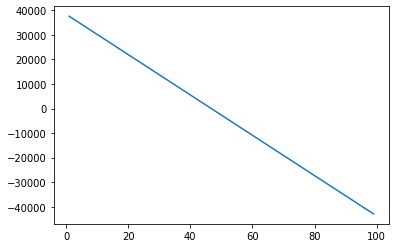

In [84]:
plt.plot(new_input,yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


#### Simple Linear Regression Model(SLR) VS Multiple Linear Regression Model(MLR)

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


#### Multiple Linear Regression vs Polynomial Fit
<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
